In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def lineal(x, a, b):
  return a*x + b

gsheet = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR_dTBWDtQGCgRD_ojD1YYlAQJMvm5EXJWpALyBhw2WAXwKQazmav_BB8BWBS8aMhnYCwjfkCiMZvw6/pub?output=csv'
data = pd.read_csv(gsheet, decimal='.')
xx = data['Distancia (mm)'].to_numpy()
VV = data['Voltaje (mV)'].to_numpy()
VV_err = data['Escala (mV)'].to_numpy()/6



Text(0, 0.5, 'Voltaje (mV)')

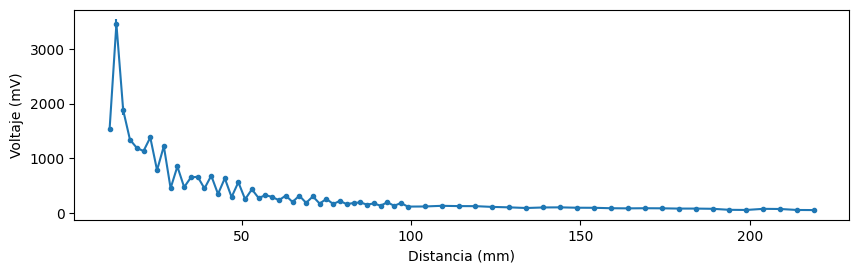

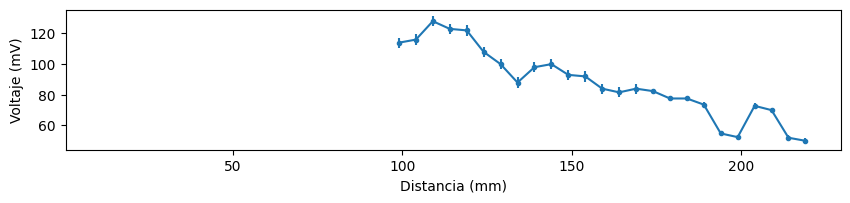

In [ ]:
#recorto datos
def cortarlista(lista_entera):
  lista_cortada = lista_entera[44:] #uso los datos a partir del dato 44
  return lista_cortada
x= cortarlista(xx)
V= cortarlista(VV)
V_err= cortarlista(VV_err)

#todos los datos
plt.figure(figsize=(10,6))
ax1 = plt.subplot(2,1,1)
plt.errorbar(xx, VV, yerr=VV_err, fmt='.-', label="Datos")
plt.xlabel('Distancia (mm)')
plt.ylabel('Voltaje (mV)')

#recortado
plt.figure(figsize=(10,4))
plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(x, V, yerr=V_err, fmt='.-', label="Datos")
plt.xlabel('Distancia (mm)')
plt.ylabel('Voltaje (mV)')


*   log(V) = long(A0) + alfa*long(x)
*  log(V) = OAO + pendiente*long(x)



otro método para ajustar


La onda decae a razon de xˆ-1.05 ± 0.10 


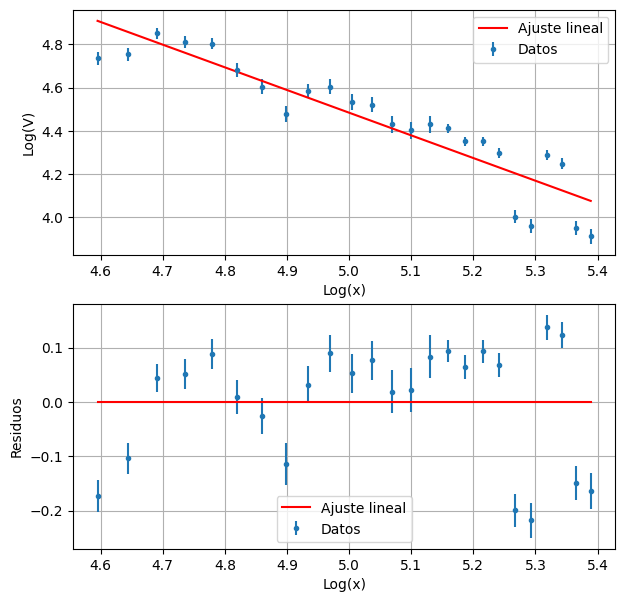

In [ ]:
#Paso a escala logaritmica
V_log = np.log(V)
x_log = np.log(x)
V_log_err = V_err/V
x_log_err = 0.1/x

#ajusto
p, cov = curve_fit(lineal, x_log, V_log)
err = np.sqrt(np.diag(cov))
y_fit = lineal(x_log, p[0], p[1])
plt.figure(figsize=(7,7))
ax1 = plt.subplot(2,1,1)
plt.errorbar(x_log, V_log, yerr=V_log_err, fmt=".", label="Datos")
plt.plot(x_log, y_fit, "-", color="red", label = "Ajuste lineal")
plt.xlabel("Log(x)"), plt.ylabel("Log(V)")
plt.grid(), plt.legend()

plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(x_log, V_log-y_fit, yerr=V_log_err, fmt='.', label="Datos")
plt.plot(x_log, y_fit*0, "-", color="red", label = "Ajuste lineal")
plt.xlabel("Log(x)"), plt.ylabel("Residuos")
plt.grid(), plt.legend()

print(f'La onda decae a razon de xˆ{pars[0]:.2f} ± {err[0]:.2f} ')

In [ ]:
#Métricas de bondad del ajuste
y_aj = y_fit
#Acá reemplazas con lo que dice en plt err barr
x, y = x_log, V_log
ey = V_log_err #error de la variable independiente, lo sacas del yerr

#buscando chi2
res_sq = (y - y_aj) ** 2 #un χ² NO ponderado
ss = res_sq/(ey**2) #un χ² ponderado, considera mas relevante a las medidas mas precisas

ch2_pond = np.sum(ss) #pond
ch2_NOpond= np.sum(res_sq)

#χ² pond= 1.3863857141811222 hasta el dato 7 sin incluirlo, seria vpp = 4
#χ² NO pond= 0.9859796651078581 hasta el dato 22 sin incluirlo, seria vpp=14

#buscando R²
prom= np.mean(y)
denom= (y - prom) ** 2
frac= res_sq/denom
R_2= np.sum(frac)

# pearson
from scipy.stats import pearsonr
rp = pearsonr(x, y)[0]

print(f'χ² pond= {ch2_pond:.3f}')
print(f'χ² NO pond= {ch2_NOpond:.3f}')
print(f'R² = {R_2:.3f}')
print(f'r_p = {rp:.3f}')

χ² pond= 350.812
χ² NO pond= 0.289
R² = 107.686
r_p = -0.917
